# Introduction to Machine Learning: Multivariable Linear Regression

Course: AI in AEC (Architecture, Engineering, and Construction) Summer School, ETH Zurich.

Author: Sophia Kuhn (sophia.kuhn@ibk.baug.ethz.ch)

In this notebook, we will explore the concept of **Multivariable Linear Regression**, an extension of simple linear regression that allows us to model the relationship between one dependent variable `y` and multiple independent features `X`. This approach enables us to capture more complex relationships within the data by considering multiple influencing factors simultaneously.

The model can be represented by the following equation:

$
\mathrm{y} = \alpha + \mathrm{x}_{1} \beta_{1} + \mathrm{x}_{2} \beta_{2} + \ldots + \mathrm{x}_{k} \beta_{k} + \varepsilon
$

In this formular:
- $y$ is the dependent variable we aim to predict,
- $x_1$, $x_2$, $...$, $x_k$ are the independent features, 
- $α$ is the intercept, 
- $β_1$, $β_2$, $...$, $β_k$ are the coefficients that represent the contribution of each feature to the prediction, 
- $ε$ is the error term.

By using multiple features, multivariable linear regression can provide a more accurate and robust model, making it a valuable tool for analyzing and predicting outcomes in complex real-world scenarios.


### Notebook Content

1. Import Data

- 2.2 Multivariable Linear Regression
        - (multi)collinearity
        - variable significance
        - considering interaction of features




### Package Import

Import the following libraries. To install these packages you can run `pip install numpy pandas matplotlib seaborn statsmodels`.


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf




## 1. Import data

As an example for multivariable linear regression, we build a model to predict the strength of concrete.

Explanation of features in the data set [1]:

$$
\begin{array}{ll}
\text { Variable } & \text { Description } \\
\hline \text { Cement } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \begin{array}{l}
\text { Blast Furnace } \\
\text { Slag }
\end{array} & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fly Ash } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Water } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Superplasticizer } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Coarse Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fine Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Age } & \text { Age (in days) of concrete mix } \\
\hline \text { Concrete } & \text { measure in megapascals (MPa) } \\
\text { Compressive } & \\
\text { Strength } & \\
\hline
\end{array}
$$

In [2]:
# Import of training dataset
df_train_concrete = pd.read_csv("concrete_train.csv")


# Import of test dataset
df_test_concrete  = pd.read_csv("concrete_test.csv")

In [3]:
df_train_concrete.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
1,339.0,0.0,0.0,197.0,0.0,968.0,781.0,7,20.97
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33
3,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100,34.56
4,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,28,34.29


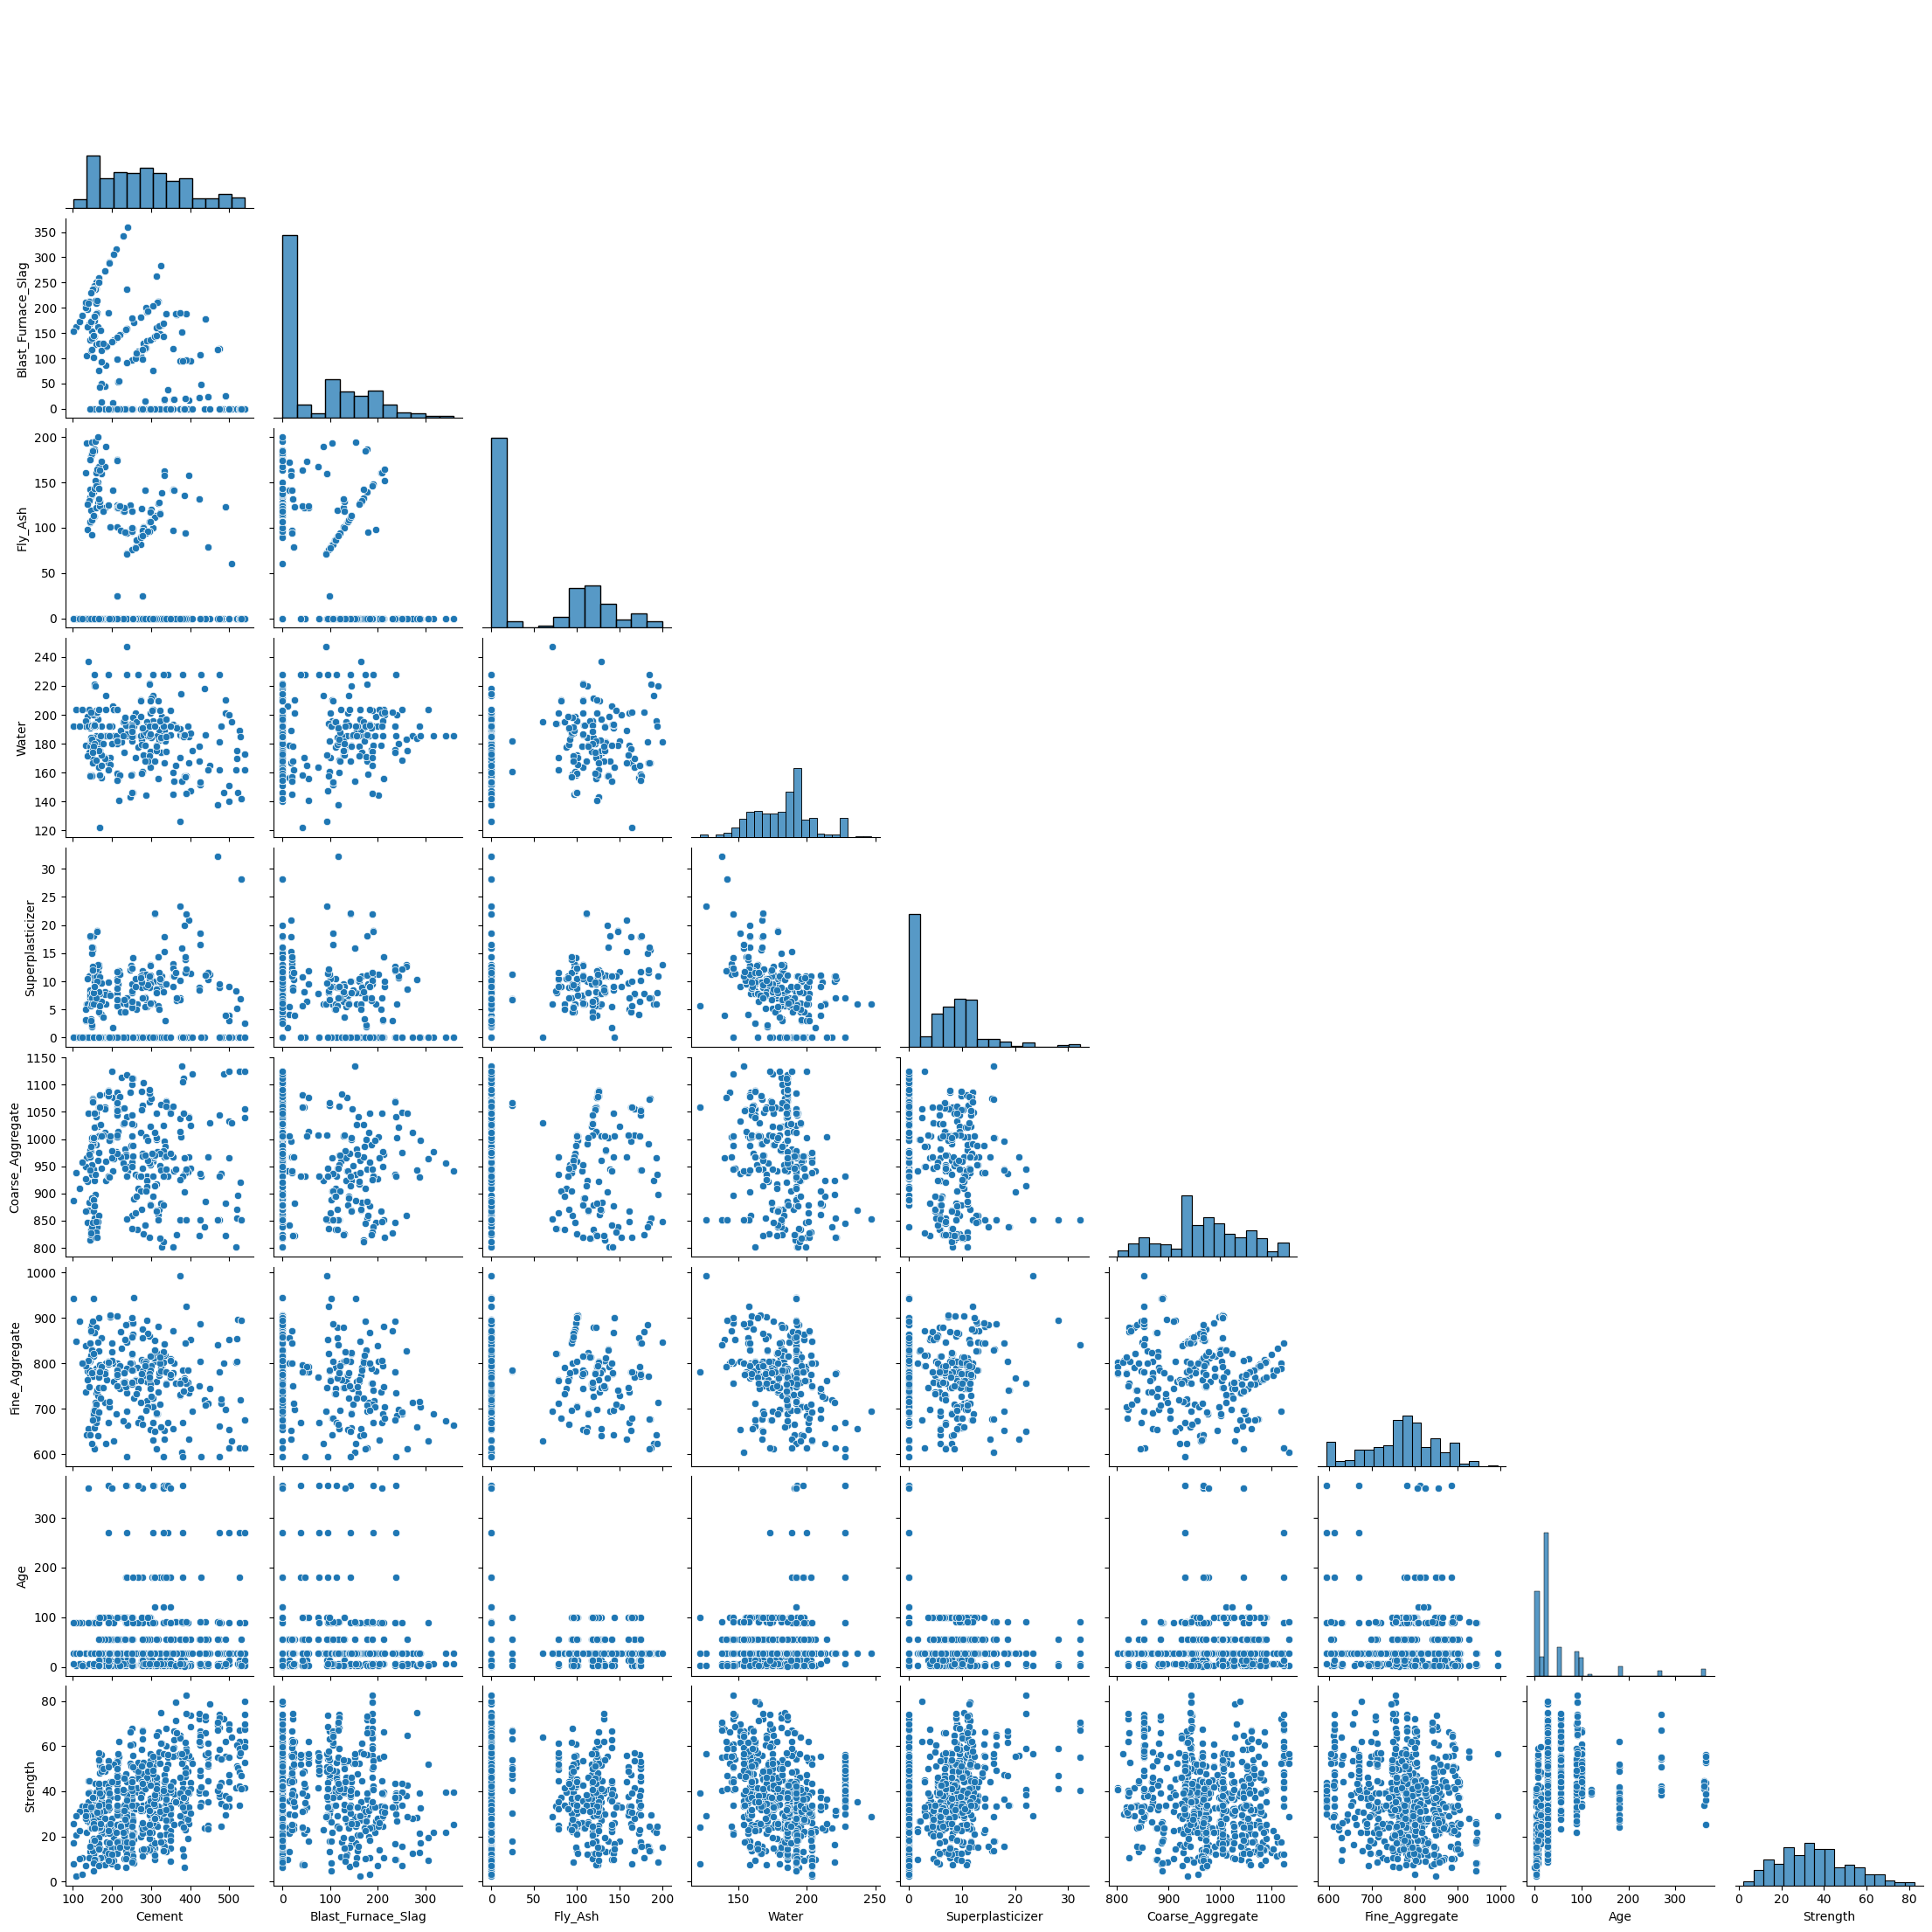

In [4]:
sns.pairplot(df_train_concrete, corner=True )

## 2. Multivariable Linear Regression
### 2.1 Training of first model

To train the model, we use the `OLS` (Ordinary Least Squares) function from the `statsmodels` library. This function allows us to perform multivariable linear regression to understand how different features influence the strength of concrete.

We define the following regression formula:

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ $$

$$\beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Coarse_Aggregate + \beta_{7} Fine_Aggregate + \beta_{8} Age $$

In this formula:
- $Strength$ is the dependent variable we aim to predict.
- $\alpha$ is the intercept of the model.
- $\beta_{1}$, $\beta_{2}$, $...$, $\beta_{8}$` are the coefficients representing the impact of each independent variable on the strength of the concrete.


By fitting this model, we quantify how each component in the concrete mix contributes to its overall compressive strength.



In [5]:

mlr_1 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate +Fine_Aggregate+ Age',
                 data=df_train_concrete ).fit()

print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.40e-137
Time:                        22:08:38   Log-Likelihood:                -2705.7
No. Observations:                 721   AIC:                             5429.
Df Residuals:                     712   BIC:                             5471.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -34.8920     32

### 2.2 Check for collinearity

<Axes: >

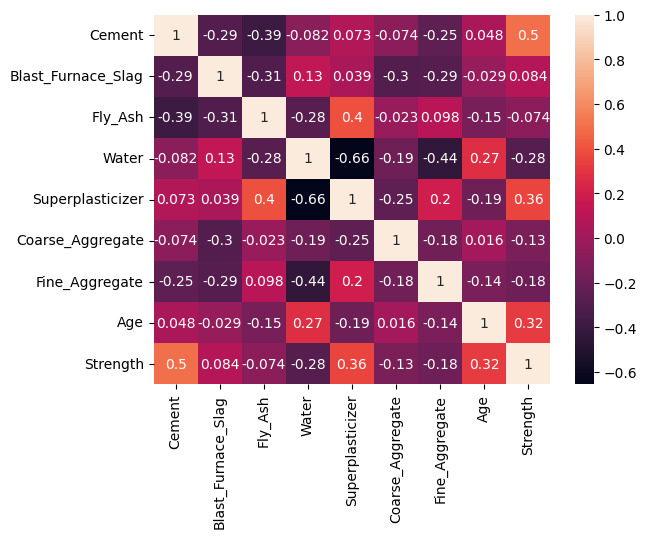

In [6]:
# check for collinearity between two features
corrMatrix=df_train_concrete .corr()
sns.heatmap(corrMatrix, annot=True)

### 2.3 Check for multicollinearity

"Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation." (see:https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37)

The Variance Inflation Factor (VIF) can be used to detect multicollinearity within the independent variables of the model.

$$\mathrm{VIF}_{j}=\frac{1}{1-R_{j}^{2}}$$

We calculate the VIF for each independent Variable of `X`. If the VIF value of any feature is >5  then multicollinearity is likely present.

It is important to remove present Multicollinearity as it reduces the precision with which the coefficients are estimated. This means the standard error of the coefficient estimation is relatively large which can lead to a reduction of prediction performance of the model.



In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  
    # the dataframe passed to VIF must include the intercept term -> add column
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [8]:
#calculate VIF Value
X_cols= df_train_concrete .columns.drop('Strength')
VIF(df_train_concrete , X_cols)

Cement                7.771301
Blast_Furnace_Slag    7.436248
Fly_Ash               6.088034
Water                 7.305806
Superplasticizer      2.934533
Coarse_Aggregate      5.189088
Fine_Aggregate        7.309983
Age                   1.105113
dtype: float64

The high VIF values show that multicollinearity is present within the independent variables of our model. We therefore choose a feature with high VIF value which is removed. This is chosen so that it results in the smallest reduction of the R2 value.

### 2.4 Train of second model

We choose to remove `Fine_Aggregate`.

To remove the feature the formular definition is changed to:

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ \beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Coarse_Aggregate + \beta_{7} Age $$



In [9]:

mlr_2 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Age',
                 data=df_train_concrete ).fit()

print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.60e-137
Time:                        22:09:57   Log-Likelihood:                -2707.3
No. Observations:                 721   AIC:                             5431.
Df Residuals:                     713   BIC:                             5467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.3138     10

In [10]:
#calc VIF Value
X_cols= df_train_concrete .columns.drop(['Strength','Fine_Aggregate'])
VIF(df_train_concrete , X_cols)

Cement                1.942272
Blast_Furnace_Slag    1.915736
Fly_Ash               2.343774
Water                 2.428075
Superplasticizer      2.802123
Coarse_Aggregate      1.548158
Age                   1.101928
dtype: float64

### 2.5 Sort Out Features with Low Significance

To determine if a variable is statistically significant for predicting the dependent variable, we can look at the p-values in the model summary above. A p-value helps us understand the strength of evidence against the null hypothesis, which typically states that there is no effect or no relationship. 

- **Low p-value (< 0.025)**: Indicates that there is strong evidence against the null hypothesis, suggesting that the feature has a statistically significant relationship with the dependent variable. In other words, changes in this feature are likely to affect the outcome, making it a valuable predictor.
- **High p-value (> 0.05)**: Suggests weak evidence against the null hypothesis, indicating that the feature is not significantly associated with the dependent variable. This means changes in this feature are less likely to have a meaningful impact on the outcome, and it might not be a useful predictor.

**Note**: The thresholds of 0.025 and 0.05 are conventional choices and can vary depending on the context and the specific requirements of your analysis.

For more detailed information on p-values, you can refer to [this blog post on interpreting p-values](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients).


### 2.6 Training of thrid model (only significant features)

In our case the feature `Coarse_Aggregate` has a high p-value and therefore a low significance for the prediction of our dependant variable `Strength`. The feature can therfore be removed.

New formula definition: 

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ $$
$$\beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Age $$


In [11]:

mlr_3 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age',
                 data=df_train_concrete ).fit()

print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.50e-138
Time:                        22:13:12   Log-Likelihood:                -2707.5
No. Observations:                 721   AIC:                             5429.
Df Residuals:                     714   BIC:                             5461.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.9785      5

### 2.7 Model Evaluation 

To evaluate our model we will use the **R-squared** metric:

$$R^{2}=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}$$

Where:
- $y_i$ is the actual value of the dependent variable (e.g., actual concrete strength) for observation \( i \).
- $\hat{y}_i$ is the predicted value of the dependent variable using our model for observation \( i \).
- $\bar{y}$ is the mean of the actual values of the dependent variable.
- $n$ is the total number of observations.


**R-squared** measures how well the independent variables explain the variability of the dependent variable. It quantifies the proportion of the total variance in the dependent variable that is captured by the model. In other words, it shows how well our model's predictions match the actual data.
- An $R^2$ value closer to 1 indicates that the model explains a large portion of the variance in the dependent variable, suggesting a good fit. 
- An $R^2$ value closer to 0 indicates that the model does not explain much of the variance, suggesting a poor fit.


In [19]:
# define Out-of-sample R2 function
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST


In [20]:
# calculate r2 calue for test set
print('OSR2:', round(OSR2(mlr_3, df_train_concrete , df_test_concrete, 'Strength'), 5))

OSR2: 0.63404


### 2.8 Considering the interaction of features


In many real-world scenarios, the effect of one feature on the dependent variable can depend on the level of another feature. To capture these more complex, non-linear relationships, we can include interaction terms in our linear regression model. Interaction terms allow us to consider the combined effect of two features, which might not be captured when considering each feature independently.

For example, the effect of the `Superplasticizer` on the `Strength` of concrete might change depending on the `Age` of the concrete. By including interaction terms, we can model these interdependencies and better capture the underlying patterns in the data.

We define our updated regression formula as follows:


$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ $$
$$\beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Age $$


New features:

$$ + \beta_{6} Superplasticizer*Age$$

$$ + \beta_{7} Fly_Ash*Age $$

$$ + \beta_{8} Fly_Ash*Water$$

$$ + \beta_{9} Fly_Ash*Superplasticizer$$

$$ + \beta_{10} Water*Superplasticizer$$


In [21]:
#training
mlr_4 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age + Superplasticizer*Age + Fly_Ash*Age  + Fly_Ash*Water + Fly_Ash*Superplasticizer + Water*Superplasticizer',
                 data=df_train_concrete ).fit()

print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     153.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.46e-179
Time:                        22:29:03   Log-Likelihood:                -2598.7
No. Observations:                 721   AIC:                             5221.
Df Residuals:                     709   BIC:                             5276.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [30]:
# model evaluation
print('OSR2:', round(OSR2(mlr_4, df_train_concrete , df_test_concrete, 'Strength'), 5))

OSR2: 0.70838



### Final Remarks

We can see that both the `R2` (R-squared) and the `OSR2` (Out-of-Sample R-squared)  values increased significantly by considering the feature interactions. 
This improvement indicates that our model's ability to explain the variance in concrete strength has been enhanced, both on the training data and when making predictions on new, unseen data. 
It demonstrates the power of capturing complex relationships between features, allowing our model to better explain the variability in the dependent variable and make more accurate predictions. Incorporating feature interactions can be a valuable strategy in enhancing model performance, particularly in scenarios where features are likely to influence each other.



# References

- [1] Grigas, P. 2021, LAB 1: INTRO TO PYTHON, discussion notebooks, UC Berkeley
 
    